# Plot.ly Charts

In [2]:
import pickle
from collections import Counter, OrderedDict

# load the pickled files from previous notebook
meat_potatoes_sent = pickle.load(open("aws_backup/meat_potatoes_sentiment.pkl", "rb"))
meat_potatoes_dict = pickle.load(open("aws_backup/meat_potatoes_dict.pkl", "rb"))
primanti_sent = pickle.load(open("aws_backup/primanti_sentiment.pkl", "rb"))
primanti_dict = pickle.load(open("aws_backup/primanti_dict.pkl", "rb"))
church_brew_sent = pickle.load(open("aws_backup/church_brew_sentiment.pkl", "rb"))
church_brew_dict = pickle.load(open("aws_backup/church_brew_dict.pkl", "rb"))

### Code for getting a table for aspect terms with most positive or most negative sentiment

In [35]:
from collections import defaultdict
lowest = defaultdict()
highest = defaultdict()
for i in meat_potatoes_dict:
    if meat_potatoes_dict[i]:
        highest[i] = meat_potatoes_dict[i].most_common()[:20]
        lowest[i] = meat_potatoes_dict[i].most_common()[-10:]

In [36]:
highest_df = pd.DataFrame(highest)
lowest_df = pd.DataFrame(lowest)

In [42]:
lowest_df = lowest_df.drop(["misc"],1)

In [43]:
highest_df = highest_df.drop(["misc"],1)

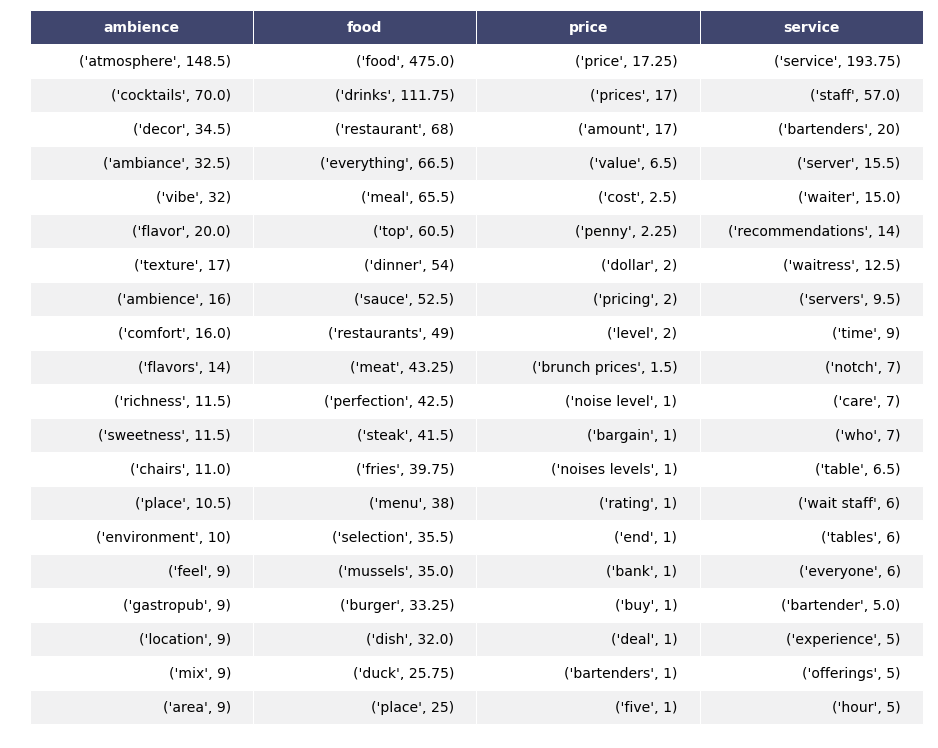

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(highest_df, header_columns=0, col_width=4.0)


### Code for visualizing reviews per aspect category and pos/neg ratio

In [4]:
primanti_df = pd.DataFrame(primanti_sent).T
meat_potatoes_df = pd.DataFrame(meat_potatoes_sent).T
church_brew_df = pd.DataFrame(church_brew_sent).T

In [5]:
primanti_df["total"] = primanti_df.neg + primanti_df.pos
primanti_df["neg_norm"] = primanti_df.neg/(primanti_df.neg + primanti_df.pos)
primanti_df["pos_norm"] = primanti_df.pos/(primanti_df.neg + primanti_df.pos)
church_brew_df["total"] = church_brew_df.neg + church_brew_df.pos
church_brew_df["neg_norm"] = church_brew_df.neg/(church_brew_df.neg + church_brew_df.pos)
church_brew_df["pos_norm"] = church_brew_df.pos/(church_brew_df.neg + church_brew_df.pos)
meat_potatoes_df["total"] = meat_potatoes_df.neg + meat_potatoes_df.pos
meat_potatoes_df["neg_norm"] = meat_potatoes_df.neg/(meat_potatoes_df.neg + meat_potatoes_df.pos)
meat_potatoes_df["pos_norm"] = meat_potatoes_df.pos/(meat_potatoes_df.neg + meat_potatoes_df.pos)

In [52]:
primanti_df

,neg,pos,total,neg_norm,pos_norm,pos/neg
ambience,122.50,282.00,404.50,0.302843,0.697157,2.302041
food,1033.50,2112.25,3145.75,0.328539,0.671461,2.043783
misc,11.25,25.00,36.25,0.310345,0.689655,2.222222
price,22.00,109.50,131.50,0.167300,0.832700,4.977273
service,213.00,309.50,522.50,0.407656,0.592344,1.453052


In [51]:
import plotly
# ***fill in username and API Key for plotly here***
plotly.tools.set_credentials_file(username='####', api_key='######')
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=primanti_df.index,
    y=primanti_df.pos_norm,
    name='% Pos Sentiment'
)
trace2 = go.Bar(
    x=primanti_df.index,
    y=primanti_df.neg_norm,
    name='% Neg Sentiment'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Aspect-Based Sentiment",
    barmode = 'stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [6]:
primanti_df["pos/neg"]=primanti_df.pos/primanti_df.neg
meat_potatoes_df["pos/neg"]=meat_potatoes_df.pos/meat_potatoes_df.neg
church_brew_df["pos/neg"]=church_brew_df.pos/church_brew_df.neg

In [26]:



data = [
    go.Scatterpolar(
      r = primanti_df["pos/neg"],
      theta = primanti_df.index,
      fill = 'toself',
      name = 'Primanti Bros.',
      textfont = dict(size=18)
    ),
    go.Scatterpolar(
      r = church_brew_df["pos/neg"],
      theta = church_brew_df.index,
      fill = 'toself',
      name = 'Church Brew Works',
      textfont = dict(size=18)
    )
]

layout = go.Layout(
    title = "Aspect Comparison",
        titlefont=dict(
            size=30,
            color='#7f7f7f'
        ),
    legend=dict(
        font=dict(
            size=18,
            )
        ),
        
    polar = dict(
        radialaxis = dict(
              visible = True,
              range = [0, 5]
            )
        ),
      showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)#, filename = "radar/multiple")

In [68]:

labels = meat_potatoes_df.index
values = meat_potatoes_df.total

trace = go.Pie(labels=labels, values=values)

py.iplot([trace])